#  <u>*Month 2 ,Week 2 : Global Land Temperatures Analysis .*</u>

## *List of Content*


[*Analysis objective*](#Analysis_objective)<br>
[*Importing data*](#Importing_data)<br>
[*Data shape*](#Data_shape)<br>
[*Data info*](#Data_info)<br>
[*Data Cleaning*](#Data_Cleaning)<br>
[*Data describtion*](#Data_describtion)<br>
[*Feature Selection*](#Feature_Selection)<br>
[*Feature Engineering*](#Feature_Engineering)<br>
[*Some Insights*](#Some_Insights)<br>
[*Features developments (SMA,CMA,EMA,EMWA)*](#Features_developments)<br>
[*Analysis conducting using SARIMAX MODUL*](#Analysis_conducting)<br>

---

In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,time

import pandas as pd
import ydata_profiling as pdf
import sweetviz as sv
from plotnine import (
    ggplot,aes,geom_point,geom_smooth,labs,theme_seaborn
)


---

<a id="Analysis_objective"></a>

## <u>*Analysis objective*</u>
### *To predict the 'LandAverageTemperature' for the years 2016, 2017, and 2018, broken down on a monthly basis*

---

<a id="Importing_data"></a>

## *A.* <u>*Importing data*</u>

In [135]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\GlobalLandTemperatures_GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


---

<a id="Data_shape"></a>

## *B.* <u>*Data shape*</u>

In [136]:
df.shape

(3192, 9)

---

<a id="Data_info"></a>

## *C.* <u>*Data info*</u>

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


---

<a id="Data_Cleaning"></a>

##  *D.* <u>*Data Cleaning*</u>

### *D.1 Converting the colnames to lower case*

In [138]:
import janitor
df=df.clean_names()

### *D.2 converting the date features "dt" to datetime type ,then renaming it with a proper name "date" and drop "dt"*

In [139]:
df["date"]=pd.to_datetime(df["dt"])

In [140]:
df.drop("dt",axis=1,inplace=True)

In [141]:
df.set_index("date",inplace=True)

### *D.3 na-values*

In [142]:
df.isna().sum().sum()
df.isna().sum()

landaveragetemperature                         12
landaveragetemperatureuncertainty              12
landmaxtemperature                           1200
landmaxtemperatureuncertainty                1200
landmintemperature                           1200
landmintemperatureuncertainty                1200
landandoceanaveragetemperature               1200
landandoceanaveragetemperatureuncertainty    1200
dtype: int64

> #### *The na_values for landaveragetemperature & landaveragetemperatureuncertainty are from '1750-11-01' to '1752-09-01'*
> #### *Since the data starts from '1849-12-01' for the other features we got 1200 rows with missed data*
> #### *We will drop all of the na-values*

In [143]:
df.dropna(inplace=True)

In [144]:
df.shape

(1992, 8)

---

<a id="Data_describtion"></a>

##  *E.* <u>*EDA --Exploration data analysis*</u>

### *E.1 Descriptive Analysis*

In [145]:
pd.DataFrame(df.describe())

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### *E.2 Data Visualization*

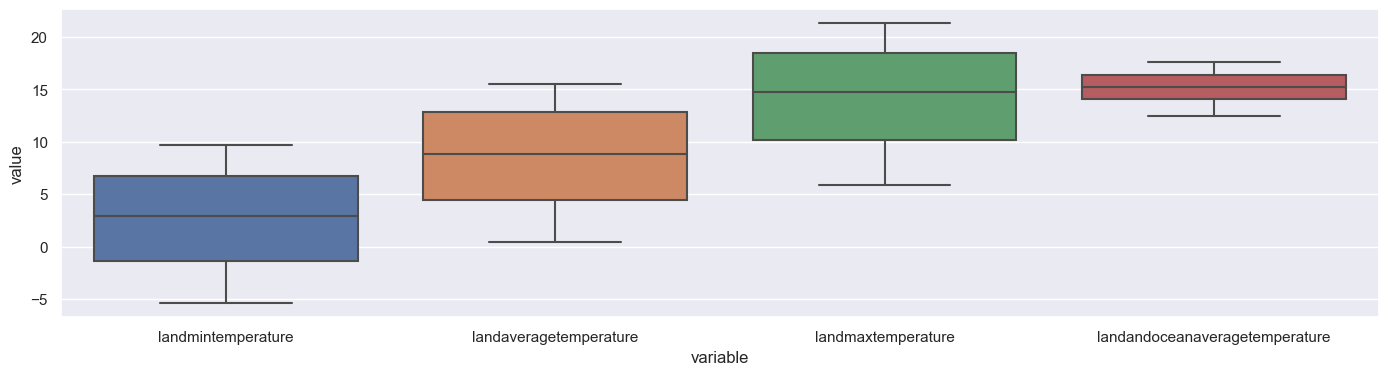

In [146]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=df.melt(value_vars=["landmintemperature","landaveragetemperature","landmaxtemperature","landandoceanaveragetemperature"]),
            x='variable', y='value');

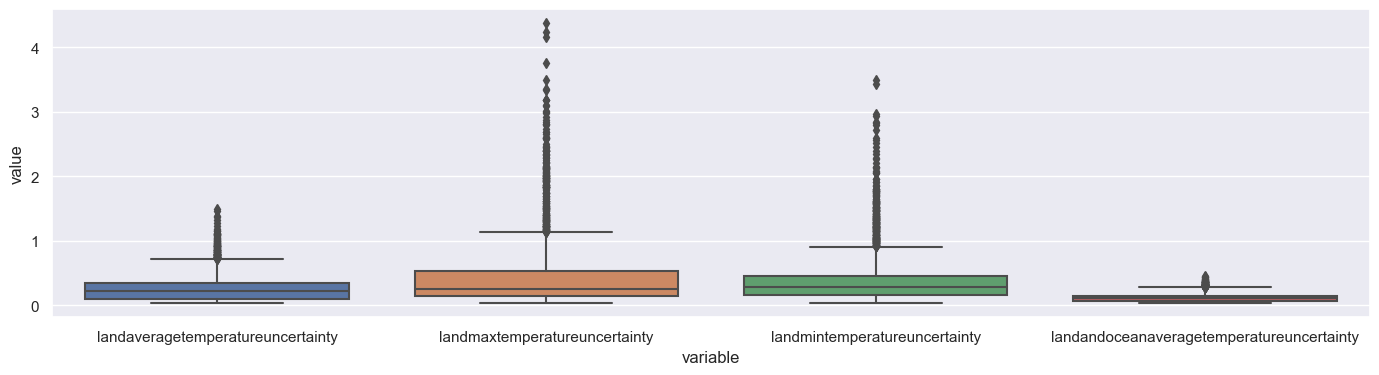

In [147]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=df.melt(value_vars=["landaveragetemperatureuncertainty","landmaxtemperatureuncertainty","landmintemperatureuncertainty",
                                    "landandoceanaveragetemperatureuncertainty"]),
            x='variable', y='value');

>  <font color=red>----> *In the 1st chart we can see that Non of the visualized variables have outliers, but the visualized variables In the 2nd chart have have outliers*<br>
> ----> *When revisualize these variables , we can clearly see that the uncertaintly were high in the beggining years and decreasong by year fowards.(-the the below line charts)*


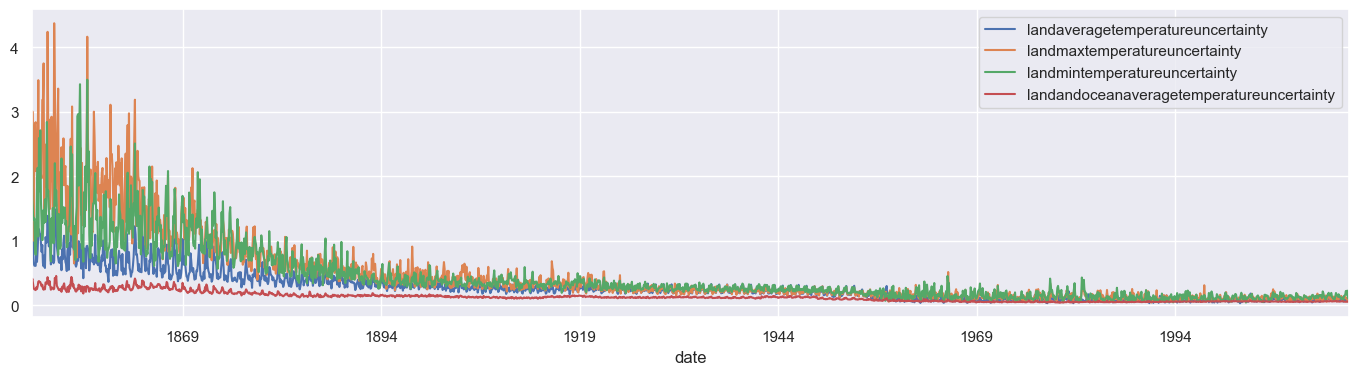

In [148]:
df[["landaveragetemperatureuncertainty","landmaxtemperatureuncertainty","landmintemperatureuncertainty",
                                    "landandoceanaveragetemperatureuncertainty"]].plot(figsize=(17, 4));

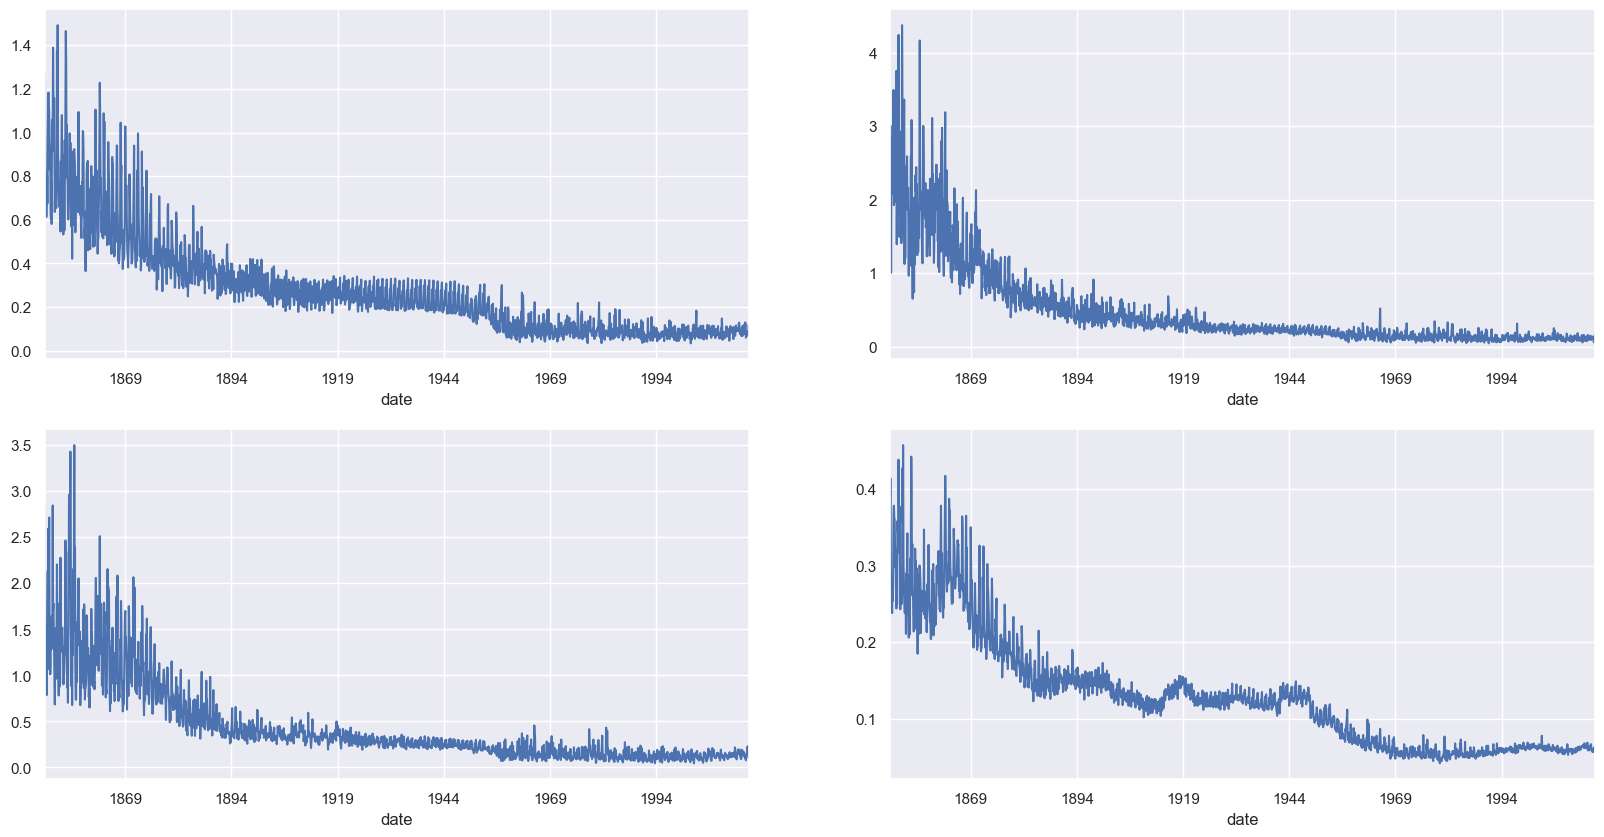

In [149]:
plt.subplot(221)
df["landaveragetemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(222)
df["landmaxtemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(223)
df["landmintemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(224)
df["landandoceanaveragetemperatureuncertainty"].plot();

> *--> This high uncertainty may be due to the leak of super technology that can increase the accurecy in data capturin*ty

### *E.3  Inferentail statistics*

In [150]:
df_stat=df.copy()

* *Before starting, we shull check if the price feature as a target feature is normally ditrubured or not*

In [151]:
import scipy.stats as stats
import pylab
def normality(data):
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(data)
        plt.subplot(1,2,2)
        stats.probplot(data,plot=pylab)
        plt.show()

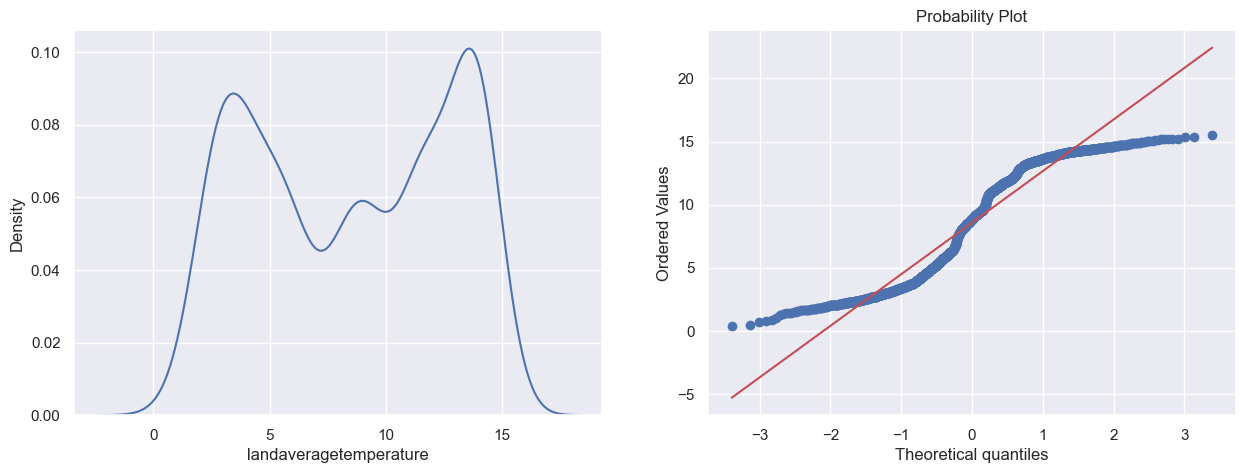

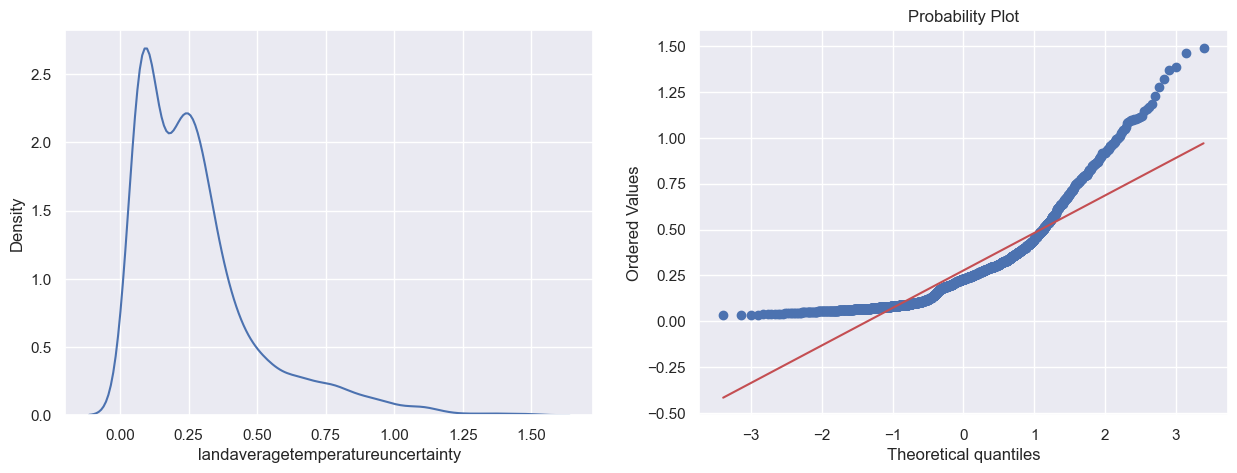

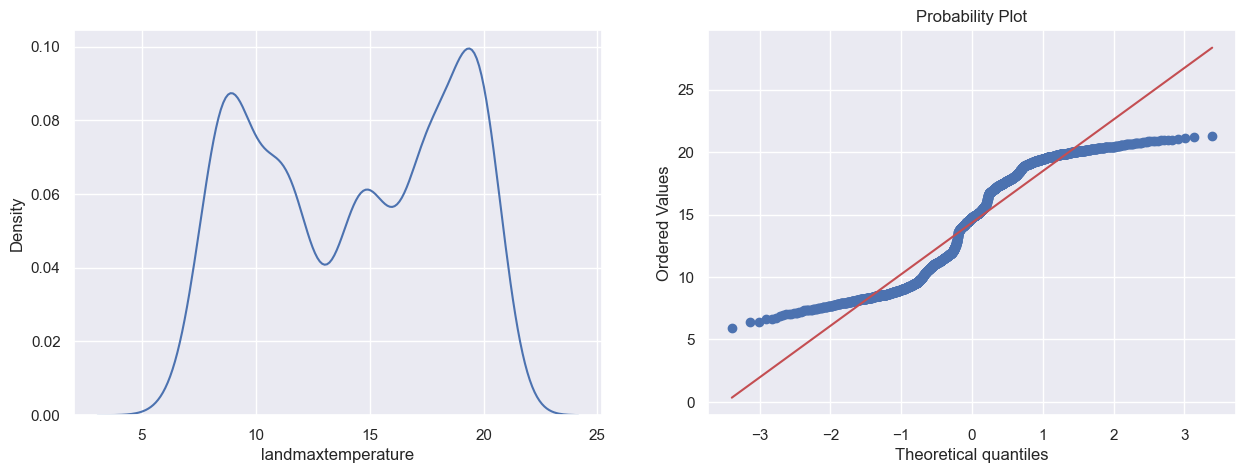

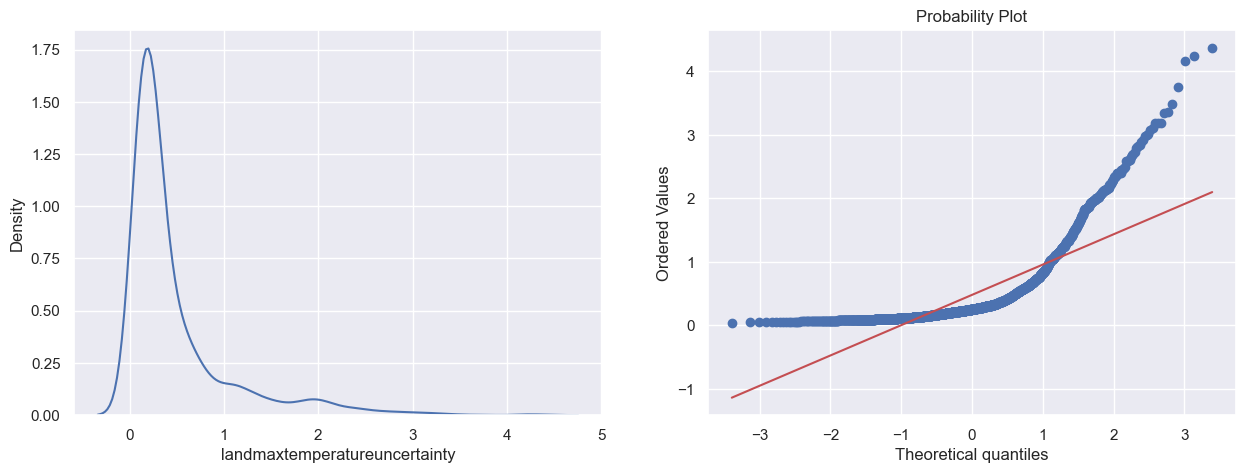

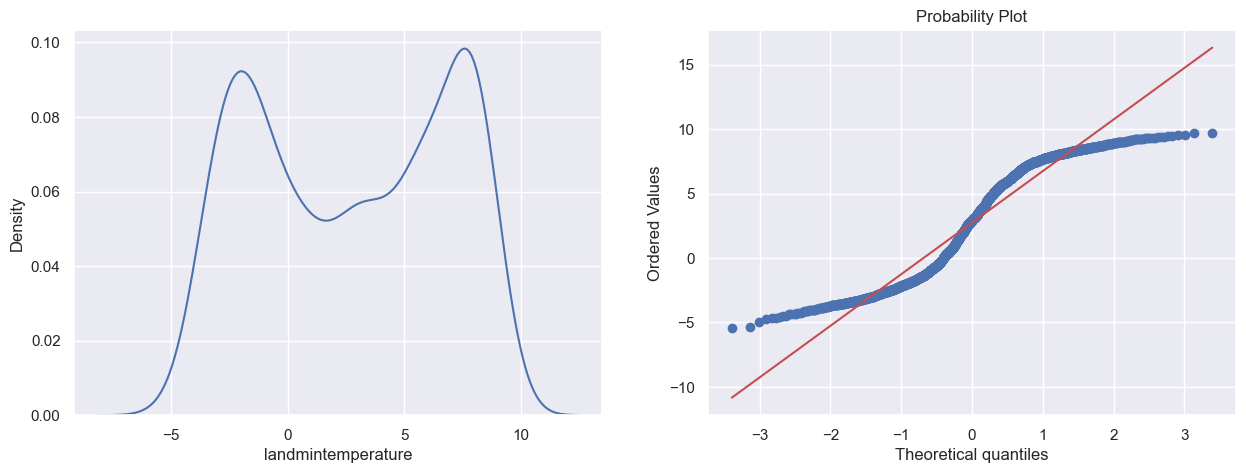

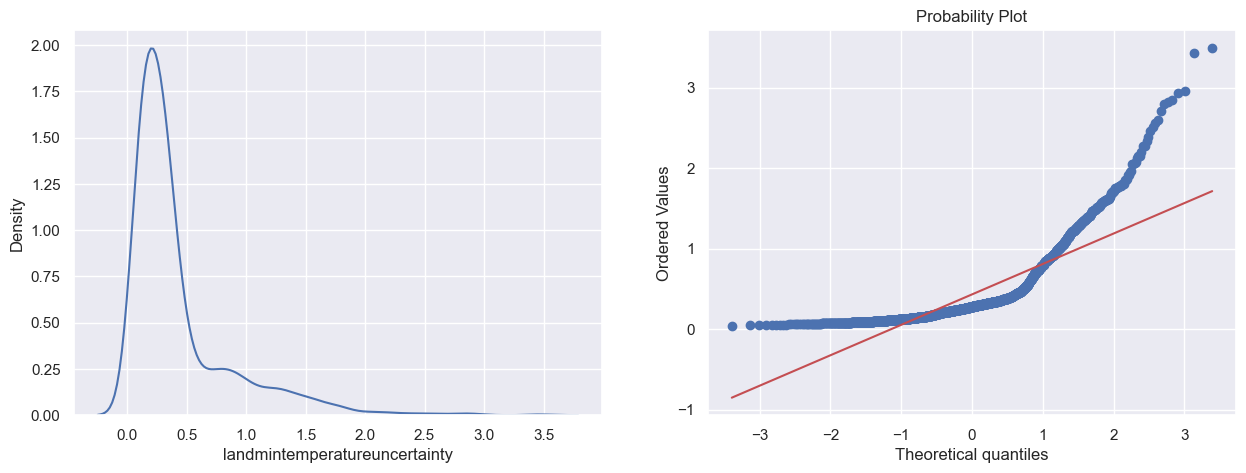

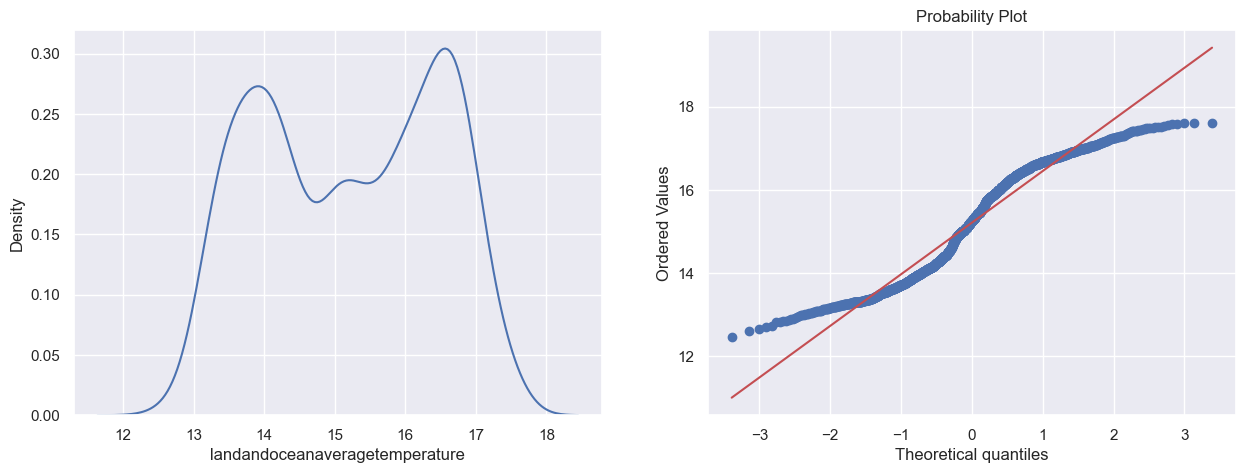

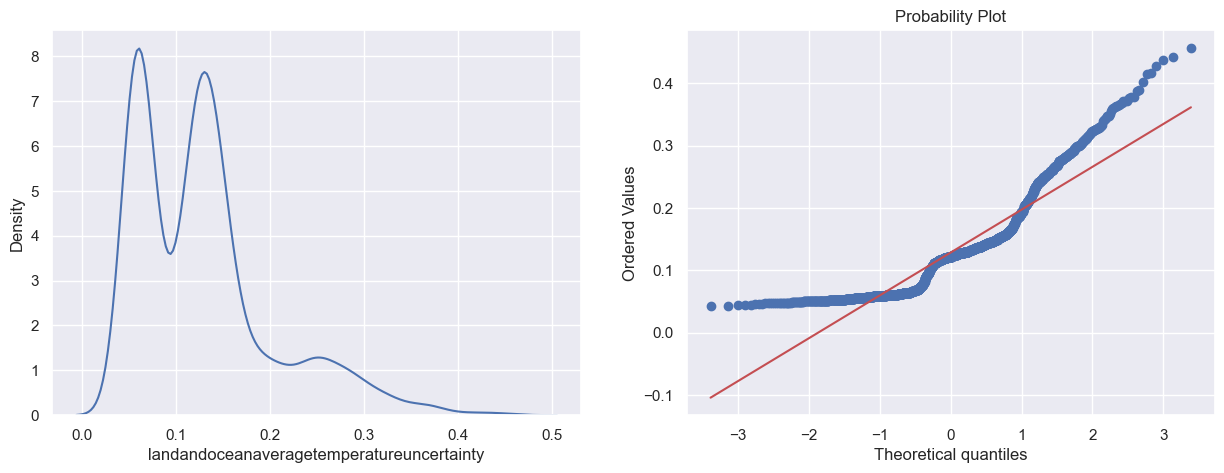

In [152]:
for col in df_stat:
    normality(df_stat[col])

In [153]:
from scipy.stats import shapiro

def shapiro_test(data, alpha = 0.05):
    for col in data:
        stat, p = shapiro(data)
        if p > alpha:
            print(f'{col} Data looks Gaussian the p value is {p}')
        else:
            print(f'{col} Data look does not look Gaussian the p value is {p}')

shapiro_test(data=df_stat) 

landaveragetemperature Data look does not look Gaussian the p value is 0.0
landaveragetemperatureuncertainty Data look does not look Gaussian the p value is 0.0
landmaxtemperature Data look does not look Gaussian the p value is 0.0
landmaxtemperatureuncertainty Data look does not look Gaussian the p value is 0.0
landmintemperature Data look does not look Gaussian the p value is 0.0
landmintemperatureuncertainty Data look does not look Gaussian the p value is 0.0
landandoceanaveragetemperature Data look does not look Gaussian the p value is 0.0
landandoceanaveragetemperatureuncertainty Data look does not look Gaussian the p value is 0.0


* *Since the above features are not normally distributed , will perform Kruskal-Wallis Test* 

In [154]:
import scipy.stats as stats
result = stats.kruskal(df_stat["landandoceanaveragetemperature"], df_stat["landmaxtemperature"],
                        df_stat["landmintemperature"],
                        df_stat["landandoceanaveragetemperature"])

result

KruskalResult(statistic=4406.030839727122, pvalue=0.0)

* *Kruskal-Wallis Test clearly says that there’s a significant difference between the features*

---

<a id="Features_developments"></a>

## *F.* <u>*Features developments*</u> 
### ---> *Before diving in , lets look at the features developments during the past time -yearly basis*

### *F.1 SMA - Simple Moving Average (yearly)*

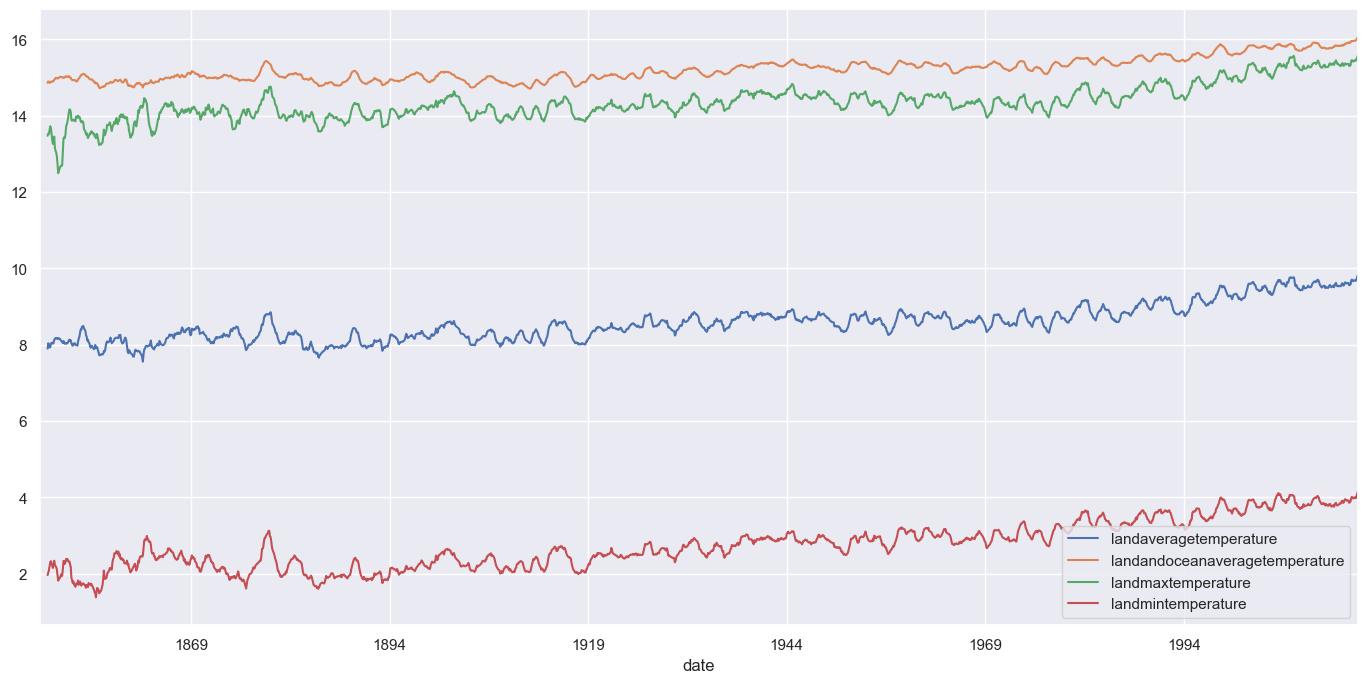

In [160]:
copy_data=df.copy()
copy_data[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].rolling(window=12).mean().plot(figsize=(17,8));

### *F.2 CMA - Cumulative Moving Avearge (yearly)*

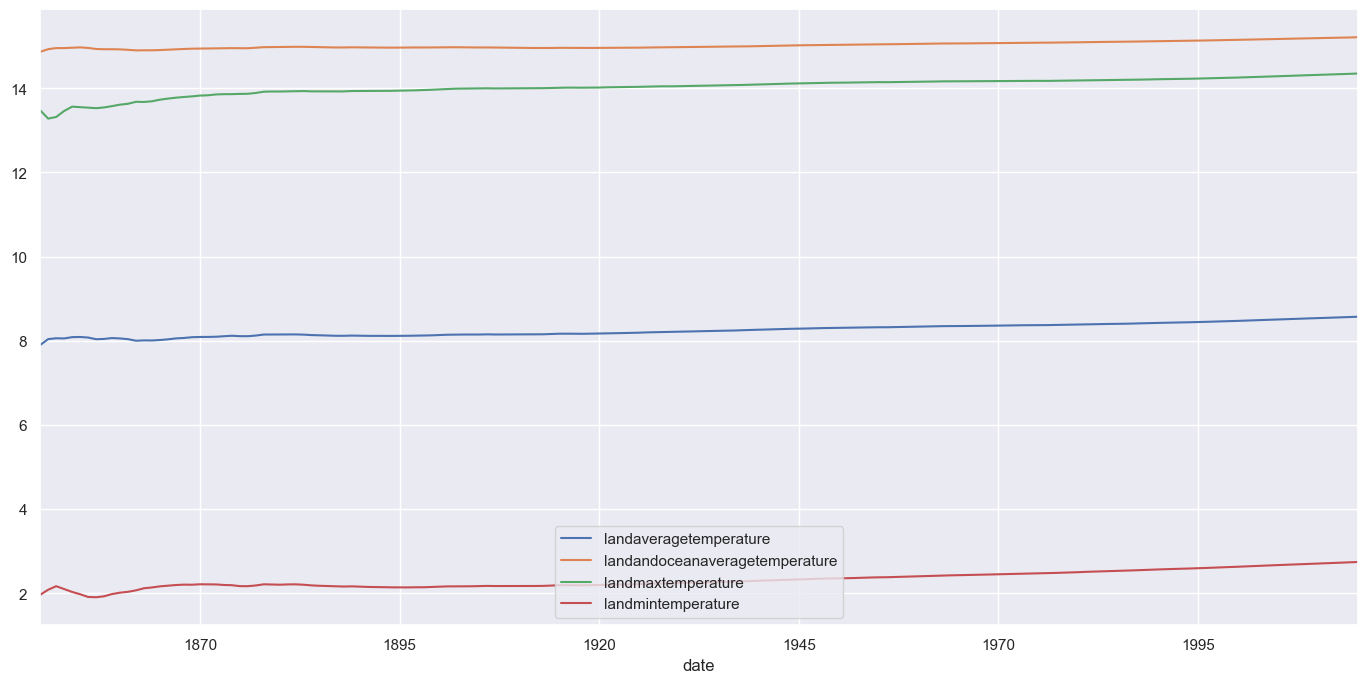

In [161]:
copy_data_y_resampled=copy_data[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].resample(rule="YS").mean()
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].expanding().mean().plot(figsize=(17,8));

### *F.3 EMA - Exponential Moving Average (yearly)*

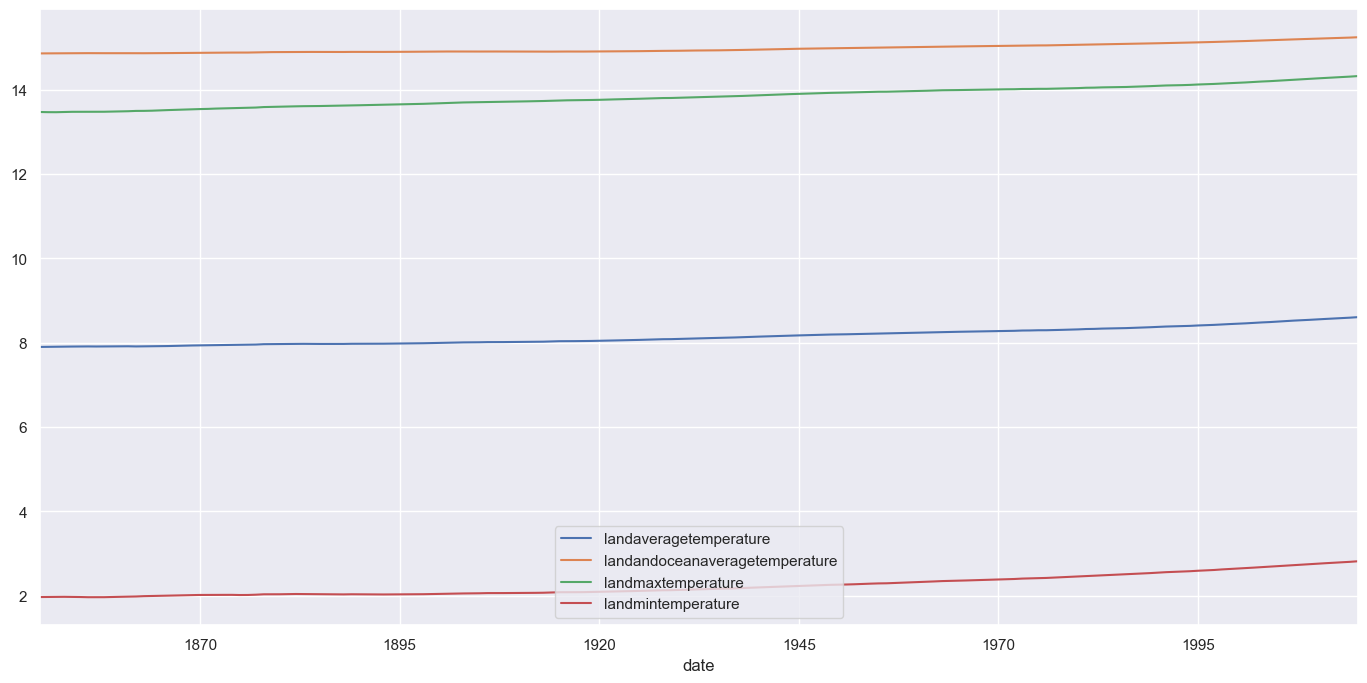

In [162]:
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].ewm(alpha=.01,adjust=False).mean().plot(figsize=(17,8));

### *F.4 EMWA - Exponential Moving Weighted Average -- this the is best method to use when it comes to times series analysus as this one gives weight for the most recent data values (yearly)*   

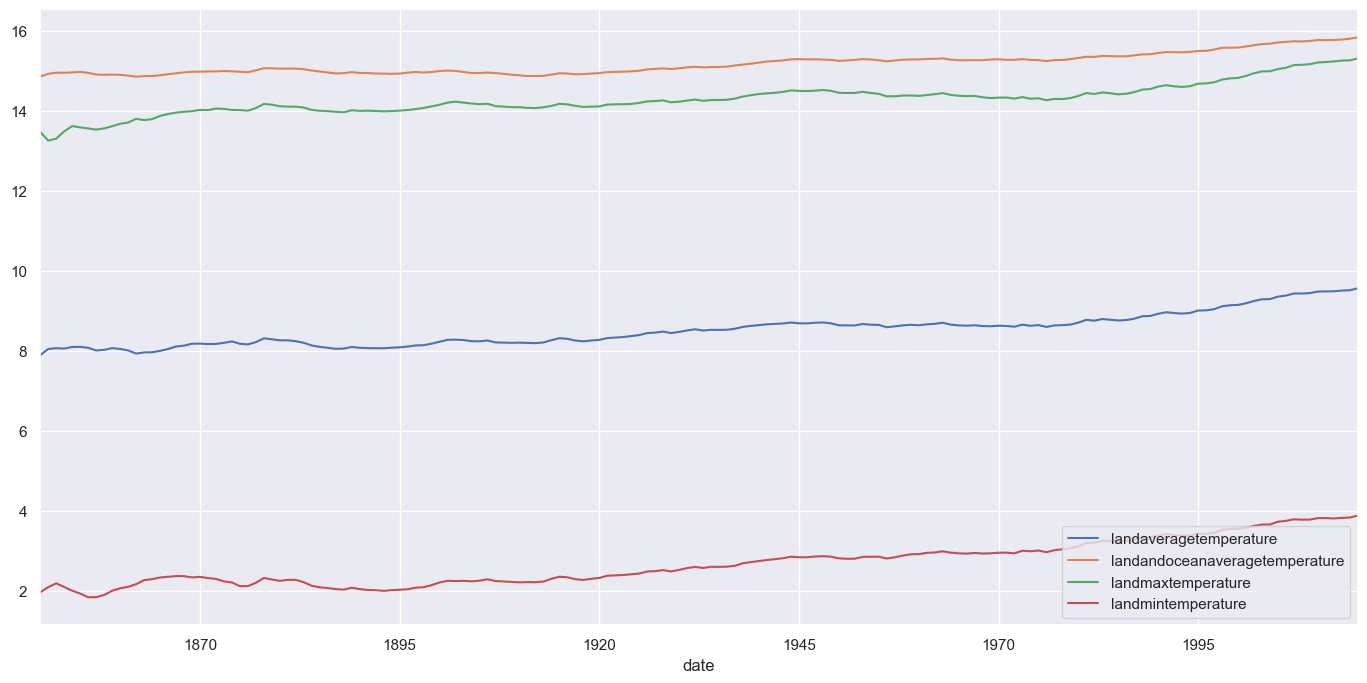

In [163]:
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].ewm(span=12).mean().plot(figsize=(17,8));

---

## *G.* <u>*Some Insights*</u>

In [164]:
df.reset_index(inplace=True)

In [165]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["quarter"]=df["date"].dt.quarter

In [166]:
df.set_index("date",inplace=True)

#### *G.1<BR>dataset date start*

In [167]:
df.index.min()

Timestamp('1850-01-01 00:00:00')

#### *G.2<BR>dataset date end*

In [168]:

df.index.max()

Timestamp('2015-12-01 00:00:00')

#### *G3<BR>the top 5 years that have the highest landaveragetemperature*

In [169]:
pd.DataFrame(df.groupby(["year"])["landaveragetemperature"].max().sort_values(ascending=False)).head()

,landaveragetemperature
year,
2011,15.482
2002,15.354
1998,15.340
2009,15.231
2007,15.230


#### *G.4<BR>the top 5 years that have the lowest landaveragetemperature*

In [170]:
pd.DataFrame(df.groupby(["year"])["landaveragetemperature"].max().sort_values(ascending=True)).head()

,landaveragetemperature
year,
1884,13.622
1858,13.677
1912,13.723
1882,13.747
1863,13.765


#### *G.5<BR>month ranking by landaveragetemperature from the highest to the lowest*

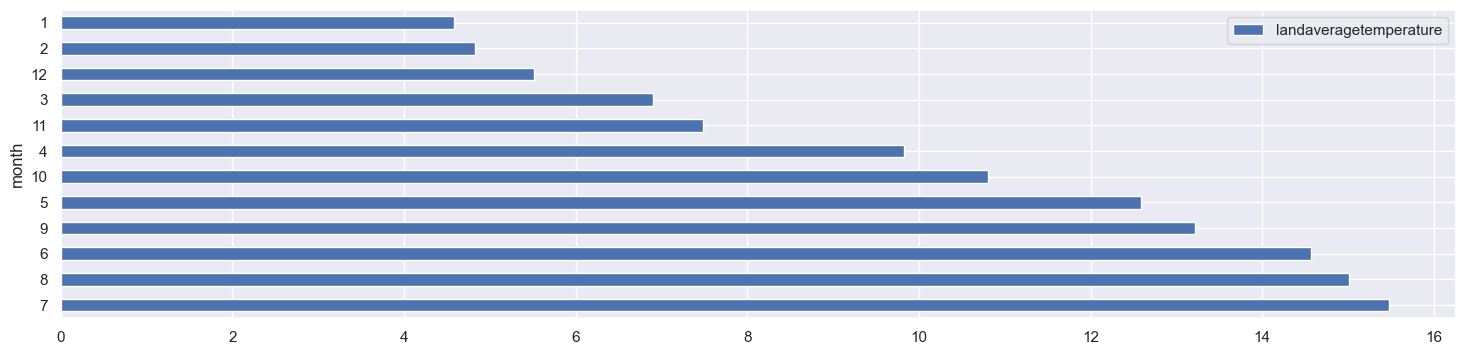

In [171]:
pd.DataFrame(df.groupby(["month"])["landaveragetemperature"].max().sort_values(ascending=False))
pd.DataFrame(df.groupby(["month"])["landaveragetemperature"].max().sort_values(ascending=False)).plot(kind="barh",figsize=(18,4));

#### *G.6<BR>decade ranking by landaveragetemperature from the highest to the lowest*

<Axes: ylabel='quarter'>

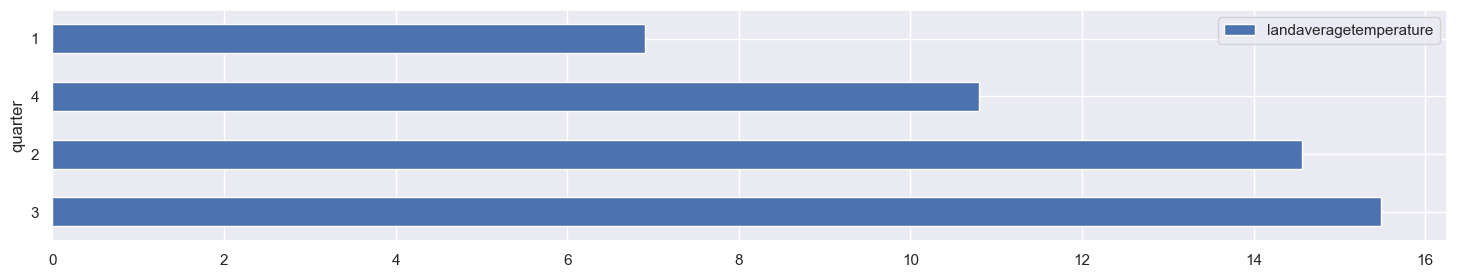

In [172]:
pd.DataFrame(df.groupby(["quarter"])["landaveragetemperature"].max().sort_values(ascending=False))
pd.DataFrame(df.groupby(["quarter"])["landaveragetemperature"].max().sort_values(ascending=False)).plot(kind="barh",figsize=(18,3))

#### *G.7<BR>the top 5 years/months in combination that have the highest landaveragetemperature*

In [173]:
pd.DataFrame(df.groupby(["year","month"])["landaveragetemperature"].max().sort_values(ascending=False)).head()

,,landaveragetemperature
year,month,
2011,7,15.482
2002,7,15.354
1998,7,15.340
2009,7,15.231
2007,7,15.230


#### *G.8<BR>the top 5 years/months in combination that have the lowest landaveragetemperature*

In [174]:
pd.DataFrame(df.groupby(["year","month"])["landaveragetemperature"].max().sort_values(ascending=True)).head()

,,landaveragetemperature
year,month,
1861,1,0.404
1893,1,0.500
1862,1,0.685
1850,1,0.749
1887,1,0.824


#### *G.9<BR> Are there any missing month in any year in the dataset?*

In [175]:
pd.pivot_table(data=pd.DataFrame(df.groupby(["year","month","landaveragetemperature"])["landaveragetemperature"].mean()),
              index="month",columns="year",values="landaveragetemperature").isna().sum().sum()

0

---

<a id="Feature_Engineering"></a>

## *H.* <u>*Feature Engineering*</u>

### *H.1 Creating forcast date range*

In [32]:
future_date_index=pd.date_range(start="2015-12-01",end="2018-12-01",freq="MS")
future_date=pd.DataFrame({"date":future_date_index}).set_index("date")

### *H.2 concatenate the forcast date range with the data dataset*

In [33]:
df=pd.concat([df,future_date])

### *H.3 filling the na-values with 0*

In [34]:
df.iloc[-36:]=df.iloc[-36:].applymap(lambda x:0)

### *H.4 Will creat new features with shifting data to use on the prediction and forcasting* <br>  
### *The shift will be for 36 rows as we are going to predict and  forcast for 36 month(3-years)* <br>*Note that we can shift 36 or more but not less*

In [35]:
shift= [36]
rolls = [7]
for s in shift:
  for roll in rolls:
        df[f"landandoceanaveragetemperature_shift_{s}_roll_{roll}"]=df["landandoceanaveragetemperature"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landandoceanaveragetemperatureuncertainty_shift_{s}_roll_{roll}"]=df["landandoceanaveragetemperatureuncertainty"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landaveragetemperature_shift_{s}_roll_{roll}"]=df["landaveragetemperature"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landaveragetemperatureuncertainty_shift_{s}_roll_{roll}"]=df["landaveragetemperatureuncertainty"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landmaxtemperature_shift_{s}_roll_{roll}"]=df["landmaxtemperature"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landmaxtemperatureuncertainty_shift_{s}_roll_{roll}"]=df["landmaxtemperatureuncertainty"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landmintemperature_shift_{s}_roll_{roll}"]=df["landmintemperature"].rolling(roll, min_periods=1).mean().shift(s)
        df[f"landmintemperatureuncertainty_shift_{s}_roll_{roll}"]=df["landmintemperatureuncertainty"].rolling(roll, min_periods=1).mean().shift(s)

### *H.5 droping na-values*

In [36]:
df.dropna(axis=0,how="any",inplace=True)

In [37]:
df.shape

(1992, 19)

### *H.6 Droping the features with no shifting exept the taget feature -("landaveragetemperature")*

In [38]:
df = df.drop(columns=["landaveragetemperatureuncertainty", "landmaxtemperature", 'landmaxtemperatureuncertainty', 'landmintemperature', 'landmintemperatureuncertainty', 'landandoceanaveragetemperature', 'landandoceanaveragetemperatureuncertainty'])

<a id="Feature_Selection"></a>

## *I.* <u>*Feature Selection*</u>

### *I.1 defining x & y*

In [39]:
x=df.drop(["landaveragetemperature"],axis=1)
y=df["landaveragetemperature"]

### *I.2 SelectKBest -Selecting the best  features based on the best score*

In [40]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression  
best=SelectKBest(score_func=f_regression,k=10).fit(x,y)
features_score=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(best.scores_)],axis=1)
features_score.columns=["feature","score"]
print(features_score.shape[0])
features_score.sort_values(by="score",ascending=False)

11


,feature,score
2,quarter,244.642835
1,month,216.410139
0,year,161.216145
3,landandoceanaveragetemperature_shift_36_roll_7,4.081056
10,landmintemperatureuncertainty_shift_36_roll_7,3.317185
4,landandoceanaveragetemperatureuncertainty_shif...,1.797432
8,landmaxtemperatureuncertainty_shift_36_roll_7,1.371807
7,landmaxtemperature_shift_36_roll_7,1.126207
6,landaveragetemperatureuncertainty_shift_36_roll_7,0.930708
9,landmintemperature_shift_36_roll_7,0.769726


---

<a id="Analysis_conducting"></a>

## *J.* <u>*Analysis Moduling*</u>

+ #### *Since we are applying SARIMAX, the modul automatically will handle the targeted feature if it is not stationary*
+ #### *We will convert the exogenous features to stationaty in case found not ,Then; Will add the new stationary features to the data set and drop the non stationay*

+ #### *Applying adfuler test to find out either the data is stationary or not* 

In [41]:
from statsmodels.tsa.stattools import adfuller
i=0
l = []
features=df.drop("landaveragetemperature",axis=1)
for x in features:
     results=adfuller(features.values[:,i])[1]
     if results > 0.05:
       print(features.columns[i] ," ",results)
       l.append(x)
     i +=1

year   0.9041772605908719
month   0.9325061040945503
quarter   0.8623702414235901
landandoceanaveragetemperature_shift_36_roll_7   0.9137268946603063
landandoceanaveragetemperatureuncertainty_shift_36_roll_7   0.05068796748080006


landaveragetemperature_shift_36_roll_7   0.8868355557300942
landmaxtemperature_shift_36_roll_7   0.5287457082317665
landmintemperature_shift_36_roll_7   0.86192615180573
landmintemperatureuncertainty_shift_36_roll_7   0.09293661255156516


+ #### *converting the not stationary to stationary*:

In [42]:
for col in l:
        if col not in ['year', 'month', 'quarter']:
            df[col]=df[col].diff(1)

In [43]:
df.dropna(axis=0,how="any",inplace=True)

In [44]:
df.head()

,landaveragetemperature,year,month,quarter,landandoceanaveragetemperature_shift_36_roll_7,landandoceanaveragetemperatureuncertainty_shift_36_roll_7,landaveragetemperature_shift_36_roll_7,landaveragetemperatureuncertainty_shift_36_roll_7,landmaxtemperature_shift_36_roll_7,landmaxtemperatureuncertainty_shift_36_roll_7,landmintemperature_shift_36_roll_7,landmintemperatureuncertainty_shift_36_roll_7
date,,,,,,,,,,,,
1853-02-01,2.228,1853.0,2.0,1.0,0.37750,0.023500,1.161000,1.190000,0.864000,2.372500,0.457500,-0.599500
1853-03-01,4.078,1853.0,3.0,1.0,0.27750,-0.016500,1.014667,1.111667,0.413667,2.382000,0.281167,-0.270833
1853-04-01,7.541,1853.0,4.0,2.0,0.29475,-0.026750,1.073083,1.000000,0.853583,2.037500,0.871333,-0.155667
1853-05-01,10.975,1853.0,5.0,2.0,0.34485,-0.019650,1.201250,0.923400,1.056350,2.111200,1.081400,-0.089800
1853-06-01,13.410,1853.0,6.0,2.0,0.37090,-0.013767,1.325167,0.871833,1.252733,2.228833,1.270100,-0.141533


+ ####  *To confirm either that 1 differnce is enough or not*

In [45]:
i=0
l2 = []
features=df.drop("landaveragetemperature",axis=1)
for x in features:
     results=adfuller(features.values[:,i])[1]
     if results > 0.05:
       print(features.columns[i] ," ",results)
       l2.append(x)
     i +=1

year   0.9042106961744822
month   0.9325013127125734
quarter   0.8624005179345798


In [46]:
df.shape

(1991, 12)

### *J.1 ACF & PACF plots to determint the number of lags we need to use in our modul*

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict,acf,pacf

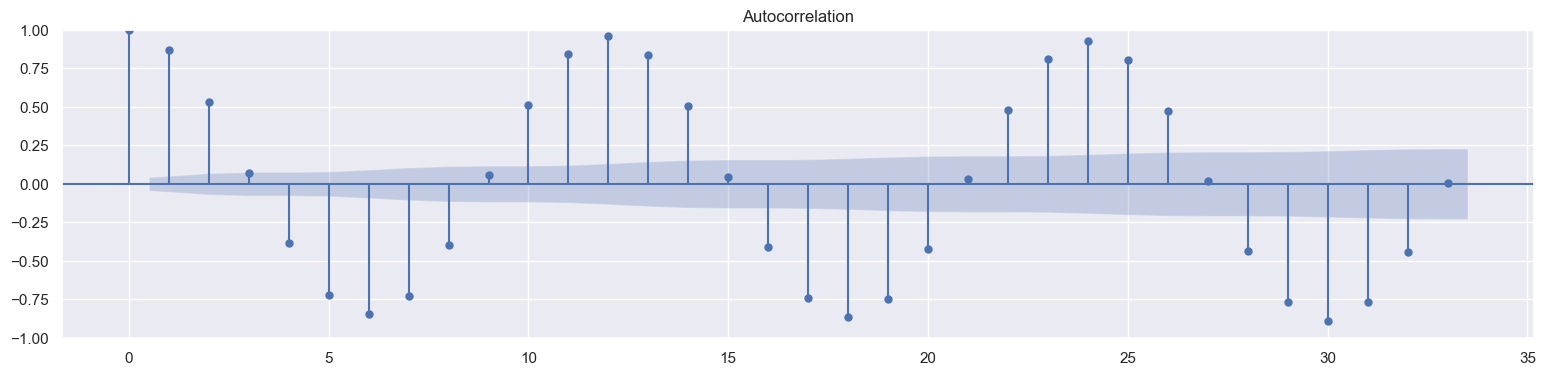

In [48]:
plot_acf(df["landaveragetemperature"]).set_size_inches(19,4);

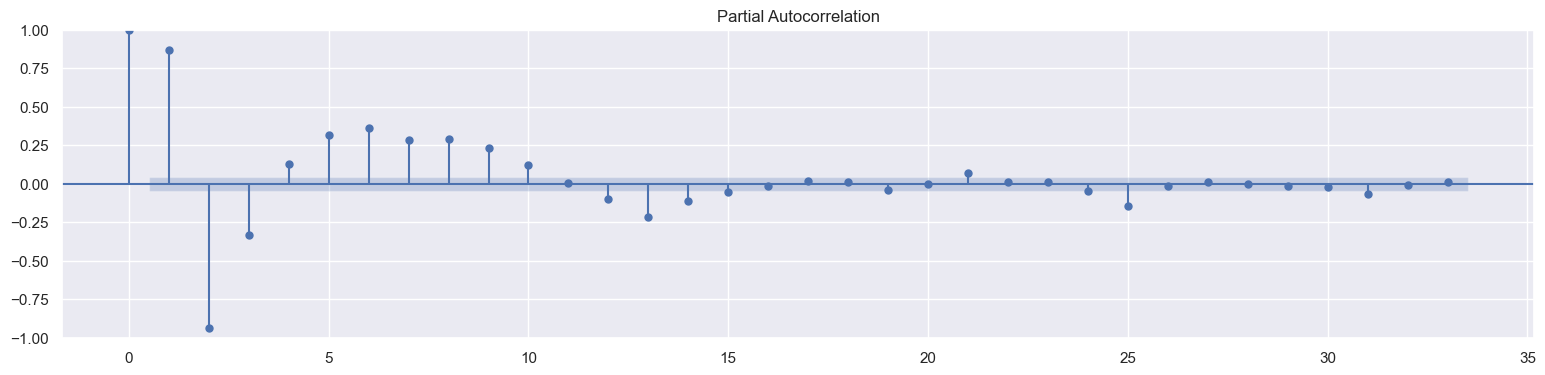

In [49]:
plot_pacf(df["landaveragetemperature"]).set_size_inches(19,4);

#### *-->We will determine the (p,d,q)valus as : (1,0,1)/(2,0,1)*  
#### *-->We will determine the (P,D,Q)valus as : (1,0,1,12)*  

### *J.2 Determining the the train the test data intervals*

In [50]:
from datetime import datetime,timedelta
train_data_end=datetime(2012,12,1)
test_data_end=datetime(2015,12,1)

In [51]:
train_data=df[:train_data_end]
test_data=df[train_data_end+timedelta(days=1):test_data_end]

In [52]:
train_data[features_score.feature.unique()].shape

(1919, 11)

### *J.3 Applying Sarimax modul on the training data*

In [53]:
## after several tries , we found that the order(2,0,7) has the lowest mse
import statsmodels.api as sm
modul_sarimax=sm.tsa.SARIMAX(train_data["landaveragetemperature"],order=(2,0,7),seasonal_order=(1,0,1,12),
                             exog=train_data[features_score.feature.unique()]).fit()

print(modul_sarimax.summary())

c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:               landaveragetemperature   No. Observations:                 1919
Model:             SARIMAX(2, 0, 7)x(1, 0, [1], 12)   Log Likelihood               -1748.257
Date:                              Sat, 23 Sep 2023   AIC                           3542.514
Time:                                      16:46:29   BIC                           3670.384
Sample:                                  02-01-1853   HQIC                          3589.563
                                       - 12-01-2012                                         
Covariance Type:                                opg                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
year

### *J.4 Applying Prediction Function on the test data*

In [54]:
prediction_start_date=test_data.index[0]
prediction_end_date=test_data.index[-1]

In [55]:
Prediction_sarimax=modul_sarimax.predict(start=prediction_start_date,end=prediction_end_date, exog=test_data[features_score.feature.unique()])

In [56]:
test_data["prediction_sarimax"]=Prediction_sarimax

### *J.5 Modul Accuracy*

#### *J.5.1 Plotting modul residual*

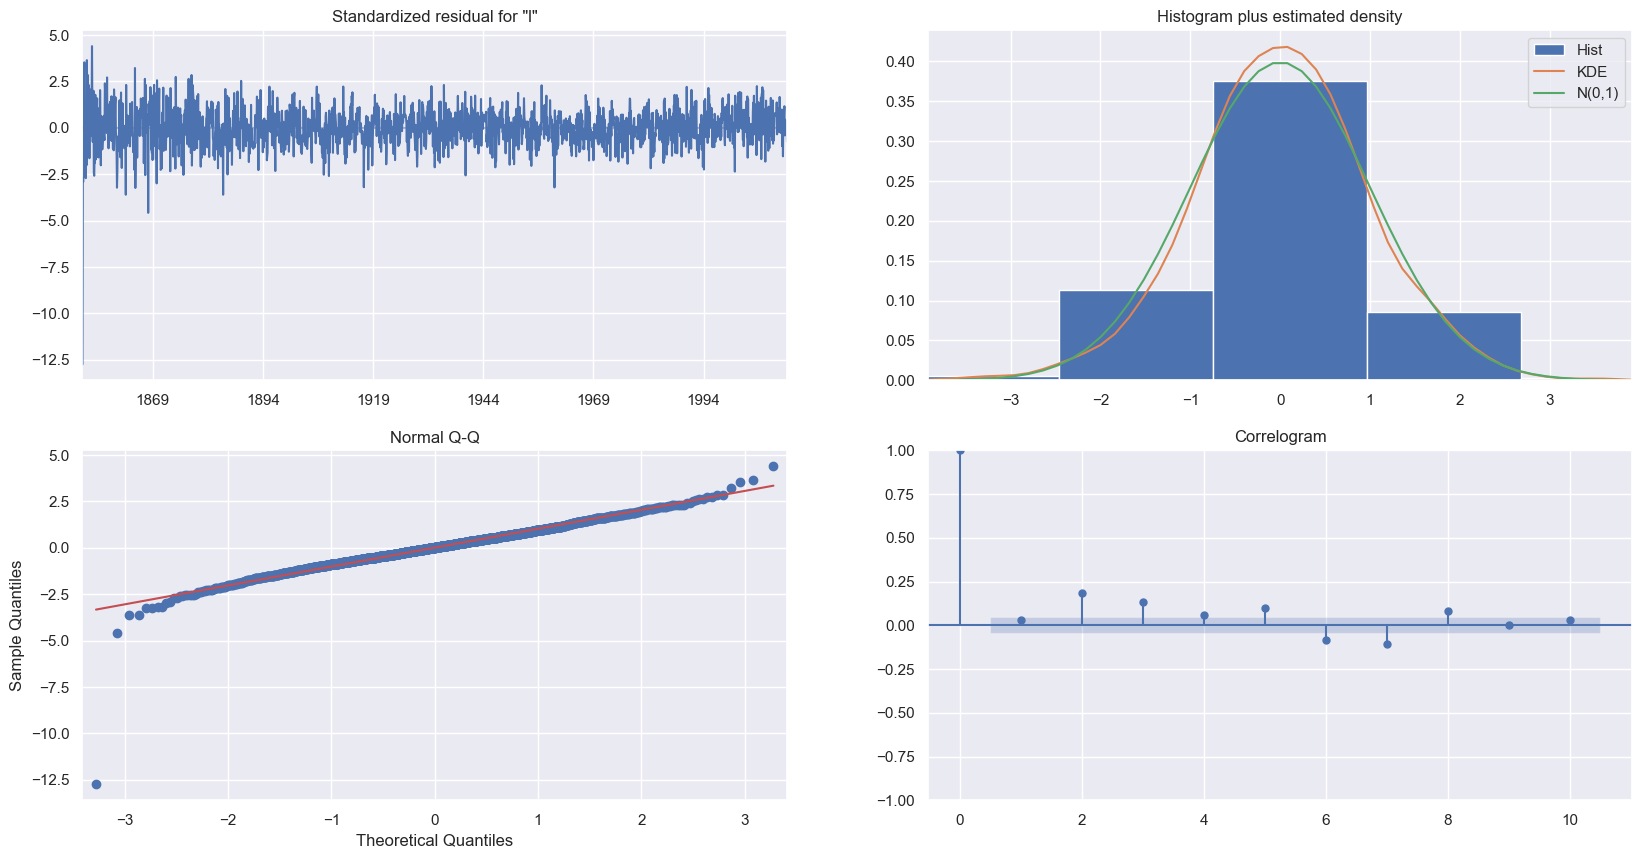

In [57]:
modul_sarimax.plot_diagnostics();

#### *J.5.2 Plotting the prediction results along with the test data to determine how our modul is fit*

<Axes: xlabel='date'>

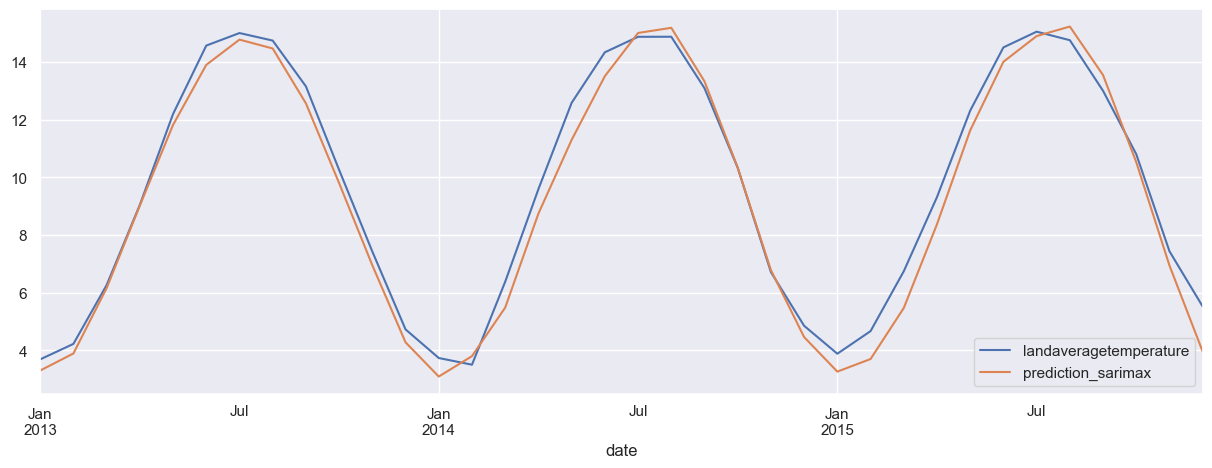

In [58]:
test_data[["landaveragetemperature","prediction_sarimax"]].plot(figsize=(15,5))

#### *J.5.3 Calculating the mse & mae*

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
mean_squared_error(test_data["landaveragetemperature"],Prediction_sarimax)

0.4036429929594933

In [61]:
mean_absolute_error(test_data["landaveragetemperature"],Prediction_sarimax)

0.5225087374180304

### *J.6 Future Prediction-forcasting*

#### *J.6.1 shiftting the train dataset for 36 rows to insure that we are forcasting on the un-seen training data*

In [62]:
train_data_shift=train_data.copy()

In [63]:
shift= [36]
rolls = [7]
for s in shift:
  for roll in rolls:
            
            train_data_shift[f"landandoceanaveragetemperature_shift_roll_train"]=train_data_shift["landandoceanaveragetemperature_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landandoceanaveragetemperatureuncertainty_shift_roll_train"]=train_data_shift["landandoceanaveragetemperatureuncertainty_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landaveragetemperature_shift_roll_train"]=train_data_shift["landaveragetemperature_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landaveragetemperatureuncertainty_shift_roll_train"]=train_data_shift["landaveragetemperatureuncertainty_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landmaxtemperature_shift_roll_train"]=train_data_shift["landmaxtemperature_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landmaxtemperatureuncertainty_shift_roll_train"]=train_data_shift["landmaxtemperatureuncertainty_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landmintemperature_shift_roll_train"]=train_data_shift["landmintemperature_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
            train_data_shift[f"landmintemperatureuncertainty_shift_roll_train"]=train_data_shift["landmintemperatureuncertainty_shift_36_roll_7"].rolling(roll, min_periods=1).mean().shift(s)
      

In [64]:
train_data_shift.dropna(axis=0,how="any",inplace=True)

In [65]:
train_data_shift.drop(["landandoceanaveragetemperature_shift_36_roll_7","landandoceanaveragetemperatureuncertainty_shift_36_roll_7",
                      "landaveragetemperature_shift_36_roll_7","landaveragetemperatureuncertainty_shift_36_roll_7",
                      "landmaxtemperature_shift_36_roll_7","landmaxtemperatureuncertainty_shift_36_roll_7",
                      "landmintemperature_shift_36_roll_7","landmintemperatureuncertainty_shift_36_roll_7"],axis=1,inplace=True)

In [66]:
train_data_shift_features_score_feature_unique=train_data_shift.drop("landaveragetemperature",axis=1)
train_data_shift_features_score_feature_unique=train_data_shift_features_score_feature_unique.columns

#### *J.6.2 Apply get_forecast function*

In [67]:
forcast_result=modul_sarimax.get_forecast(steps=36,exog=train_data_shift[train_data_shift_features_score_feature_unique].iloc[-36:])
forcast_result =pd.DataFrame(forcast_result.predicted_mean) 

#### *J.6.3 Adding the forcast_result into the original data set*

In [68]:
future_data=df.iloc[-36:]
future_data["forcast_result"]=forcast_result.values
df["forcast_result"]=future_data['forcast_result']

#### *J.6.4 Visualizing our results*

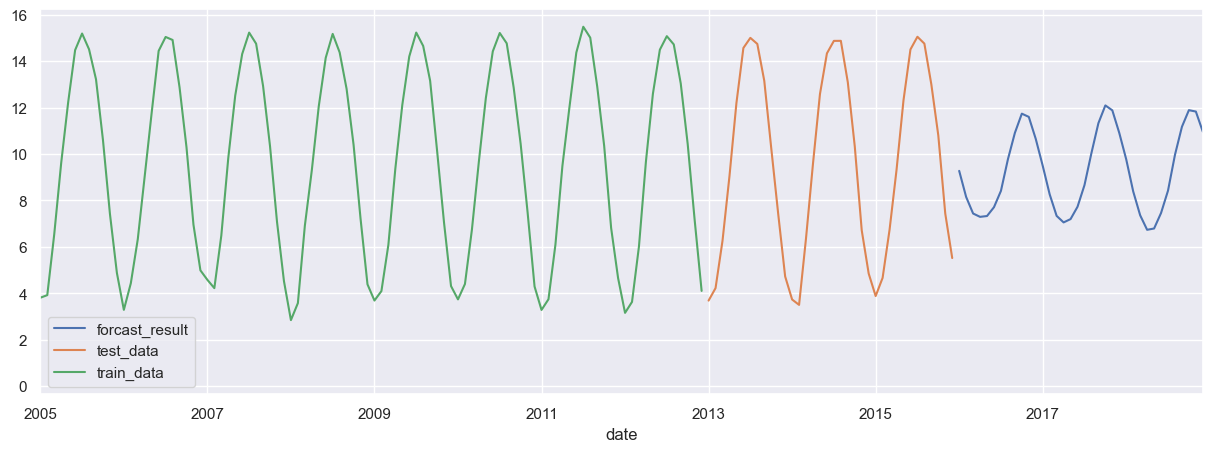

In [69]:
df[["forcast_result"]].plot(figsize=(15,5),xlim=["2005-01-01","2018-12-01"]);
test_data["landaveragetemperature"].plot(figsize=(15,5),xlim=["2005-01-01","2018-12-01"])
train_data["landaveragetemperature"].plot(figsize=(15,5),xlim=["2005-01-01","2018-12-01"]);
plt.legend(labels=["forcast_result","test_data","train_data"],loc="lower left");

---
---